# Pointers

- bytes and addresses
- motivating the heap
  - the stack has a fixed size based on the values identified at compile time
    - what if you need a dynamic number of items (i.e. a data structure)?
- motivating pointers
  - when data is on the stack, the compiler knows which variables refer to which locations in memory
  - if I have dynamic data, how do I create and refer to those slots?
 - `delete`

In [1]:
#include <iostream>
using std::cout, std::endl;

#include <string>
using std::string;

In [2]:
/*
    This method prints the address of the data
    i.e. where in memory does the "thing" reside
*/
template <class T>
void where(T const& thing) {
    printf("where: %p\n", &thing);
}

In [3]:
/*
  This method prints the bytes in RAM that a given variable has
  i.e. what are the actual 1s and 0s that occupy the space given to "thing"
  Prints the bytes in hexidecimal.
*/
template <class T>
void bytes(T const& thing) {
    unsigned char* addr = (unsigned char*)&thing;
    printf("bytes: 0x");
    for (int i = sizeof(T) - 1; i >= 0; i--) {
        printf("%02x", addr[i]);
    }
    printf("\n");
}

In [4]:
/*
  This method prints the bits in an 8-bit chunk
*/
void print_bits(char chunk) {
    for (int b = 7; b >= 0; b--) {
        if (chunk & (1 << b)) {
            printf("1");
        } else {
            printf("0");
        }
    }
}

In [5]:
/*
  This method prints the bits in RAM that a given variable has
  i.e. what are the actual 1s and 0s that occupy the space given to "thing"
*/
template <class T>
void bits(T const& thing) {
    unsigned char* addr = (unsigned char*)&thing;
    printf("bits:  0b");
    for (int i = sizeof(T) - 1; i >= 0; i--) {
        print_bits(addr[i]);
    }
    printf("\n");
}

In [6]:
template<class T>
void size(T const& thing) {
    printf("size:  %lu\n", sizeof(T));
}

## Let's look at stuff...

In [55]:
struct Stuff {
    int number;
    bool fact;
    char symbol;
    Stuff(int number, bool fact, char symbol) : number(number), fact(fact), symbol(symbol) {}
};

In [56]:
Stuff stuff(7, true, 'B');  // 'B' is hexidecimal 42 (4 * 16 + 2 = 66 ASCII)
size(stuff);
bytes(stuff);
bits(stuff);

size:  8
bytes: 0x0000420100000007
bits:  0b0000000000000000010000100000000100000000000000000000000000000111


In [57]:
where(stuff)

where: 0x40091ce0a8


## Linked Lists

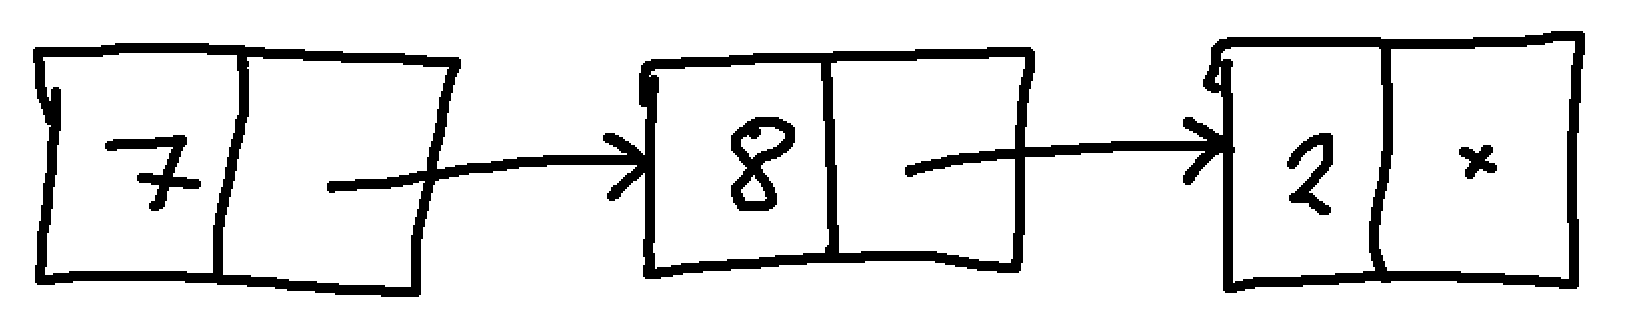

### `static_linked_list.cpp`

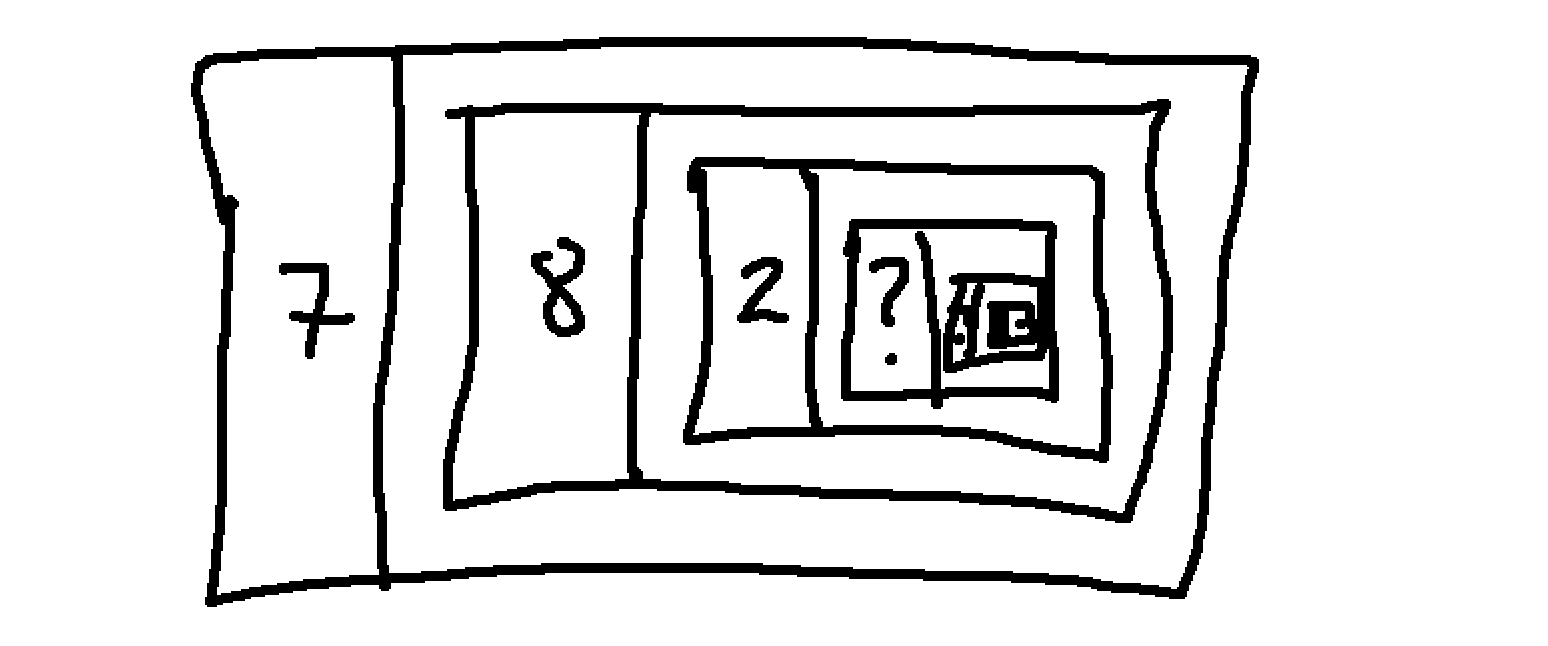

The sizes of primitive types, classes, and call frames must be known at compile time.

So if we need the amount of space used by a class to by dynamic (e.g. a data structure), then we need **dynamic memory allocation**.

## `new`

In [58]:
int* number_ptr = new int(7);

In [59]:
cout << number_ptr << endl;

0x4012d64bd0


In [60]:
cout << (*number_ptr) << endl;

7


Use the unary `*` operator to **dereference** a pointer and get the value.

In [61]:
size(number_ptr);
bytes(number_ptr);
where(number_ptr);

size:  8
bytes: 0x0000004012d64bd0
where: 0x40091ce0b0


In [62]:
size(*number_ptr);
bytes(*number_ptr);
where(*number_ptr);

size:  4
bytes: 0x00000007
where: 0x4012d64bd0


In C++, a **pointer** is a variable whose *value* is the address of another value.

In [63]:
class HasInt {
    int the_int;
    public:
    HasInt(int value) : the_int(value) {}
    void set_int(int new_value) { the_int = new_value; }
    int get_int() const { return the_int; }
}

In [64]:
HasInt foo(8);
cout << foo.get_int() << endl;

8


In [65]:
size(foo);
bytes(foo);
where(foo);

size:  4
bytes: 0x00000008
where: 0x40091ce0b8


In [66]:
HasInt* bar = new HasInt(7);

In [67]:
size(bar);
bytes(bar);
where(bar);

size:  8
bytes: 0x0000004013e7bac0
where: 0x40091ce0c0


In [68]:
size(*bar);
bytes(*bar);
where(*bar);

size:  4
bytes: 0x00000007
where: 0x4013e7bac0


In [69]:
cout << bar.get_int() << endl;

input_line_78:2:13: error: member reference type '__cling_N564::HasInt *' is a pointer; did you mean to use '->'?
 cout << bar.get_int() << endl;
         ~~~^
            ->


Interpreter Error: 

In [70]:
cout << (*bar).get_int() << endl;

cout << bar->get_int() << endl;


7
7


In [71]:
HasInt first(8);
cout << first.get_int() << endl;

8


In [72]:
HasInt second = first;
cout << second.get_int() << endl;

8


In [73]:
second.set_int(3);
cout << second.get_int() << endl;

3


In [74]:
cout << first.get_int() << endl;

8


In [75]:
where(first);
where(second);

where: 0x40091ce0c8
where: 0x40091ce0cc


In [76]:
HasInt* one = new HasInt(8);
cout << one->get_int() << endl;

HasInt* two = one;
cout << two->get_int() << endl;

8
8


In [77]:
two->set_int(3);
cout << two->get_int() << endl;

3


In [78]:
cout << one->get_int() << endl;

3


In [79]:
bytes(one);
bytes(two);

bytes: 0x00000040282884c0
bytes: 0x00000040282884c0


In [80]:
where(*one);
where(*two);

where: 0x40282884c0
where: 0x40282884c0


Pointers give you the ability to have multiple variables dynamically point to the same chunk of data.

**References** (e.g. `int& foo`) let you have more than one __*name*__ for a chunk of data.

**Pointers** let you have multiple variables all store the same __*address*__ for a chunk of data.

## `nullptr`

In [81]:
HasInt* foo = nullptr;  // Similar to None in Python or null in Java

In [82]:
bytes(foo)

bytes: 0x0000000000000000


In [83]:
bytes(nullptr)

bytes: 0x0000000000000000


## `nom_nom.cpp`  😋

When you call `new`, your value is put on the **heap**. It stays there, even after the current function exits.

If you never clean up unused values on the heap, your program wastes more and more memory. 

We call this a **memory leak**.

### Make sure that every byte put on the heap is eventually deleted.

## `delete`

In [84]:
int* on_the_heap = new int(2);

bytes(on_the_heap);
where(*on_the_heap);
bytes(*on_the_heap);

bytes: 0x0000004028340cc0
where: 0x4028340cc0
bytes: 0x00000002


In [85]:
delete on_the_heap;

bytes(on_the_heap);
where(*on_the_heap);
bytes(*on_the_heap);


bytes: 0x0000004028340cc0
where: 0x4028340cc0
bytes: 0x12c15f50


Deleting a pointer does (or does not) not change the value on the heap.

It simply makes the space used by the value available for a future value to use.

Good practice is to set your pointer to `nullptr` after you delete it so you don't accidentally try to read the data that may be overwritten at any moment.

### `clean_up.cpp`

In [7]:
struct Node {
    int value;
    Node* next;
    Node(int value) : value(value), next(nullptr) {}
};

In [8]:
void print(const Node* node) {
    if (node == nullptr) {
        printf("nullptr");
    } else {
        printf("%d -> ", node->value);
        print(node->next);        
    }
}

In [9]:
Node* head = new Node(7);
print(head);

7 -> nullptr

In [10]:
head->next = new Node(8);
print(head)

7 -> 8 -> nullptr

In [11]:
head->next->next = new Node(9);
print(head)

7 -> 8 -> 9 -> nullptr

<div style="font-size: 200px">🤪</div>

In [12]:
void add(Node*& node, int value) {
    if (node == nullptr) {
        node = new Node(value);
    } else {
        add(node->next, value);
    }
}

In [13]:
add(head, 3);
print(head);

7 -> 8 -> 9 -> 3 -> nullptr

In [14]:
add(head, 11);
print(head);

7 -> 8 -> 9 -> 3 -> 11 -> nullptr

### 👷🏾 Clear a Linked List

Write a recursive function that clears a linked list.

**Hint**

- To clear a piece of the list:
  - clear the rest of the list
  - clear the current item

In [15]:
void clear(Node*& node) {
    if (node != nullptr) {
        // Clear the rest of the list first
        clear(node->next);
        
        // Now clear this node
        printf("deleting %d\n", node->value);
        delete node;
        node = nullptr;
    }
}

In [16]:
print(head);
clear(head);
print(head);

7 -> 8 -> 9 -> 3 -> 11 -> nullptrdeleting 11
deleting 3
deleting 9
deleting 8
deleting 7
nullptr

## `singly_linked.cpp`

- `struct`
- nested class/struct `Node`
  - existence of class if private to `SLList`
  - is in scope of the outer `template`
  - shouldn't expose `Node` in any of the public methods
- pointer references `Node *&node`
  - allows changes to the pointer
  - you can pass in a pointer with value `nullptr` and make the value not be `nullptr` anymore
  - Java and Python do not have an equivalent concept of passing by reference
- deliberate choice of recursive implementation
  - familiar to CS 111 students
  - similar to encouraged BST/AVL implementation
  - start the conversation on `Node *&node`
  - understand both `_add` and `_clear`
    - note the post-recursion logic in `_clear`
- Destructor `~SSList`
  - to clean up memory allocated by the class with `new`
  - `delete`